In [1]:
import os
import rasterio as rio
import numpy as np
import shapely
from shapely.geometry import Polygon, MultiPolygon, box
import pyproj
import geopandas as gpd
import matplotlib.pyplot as plt
import rioxarray as riox
import rasterio as rio
import xarray as xr
import netCDF4
from osgeo import gdal
import pandas as pd
from datetime import datetime
import dask.array
import matplotlib as mpl
from matplotlib.colors import TwoSlopeNorm, LogNorm
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch, Circle
import matplotlib.ticker as mticker
import sklearn
import importlib
import cartopy.crs as ccrs
import cartopy as ctp

import sys
sys.path.append('../')
import snowFun

In [2]:
importlib.reload(snowFun)

<module 'snowFun' from 'C:\\Users\\lzell\\OneDrive - Colostate\\Desktop\\AGVA\\scripts\\Figures\\..\\snowFun\\__init__.py'>

In [3]:
# define folder and file paths
folder_AGVA = os.path.join('C:',os.sep,'Users','lzell','OneDrive - Colostate','Desktop',"AGVA")
folder_plotting = os.path.join(folder_AGVA, 'Plotting')
folder_figures = os.path.join(folder_AGVA, 'Figures', 'training data example')

# open each of the figures we are going to be plotting
xr_snow = riox.open_rasterio(os.path.join(folder_figures, "snow_on2.tif"))
xr_raw = riox.open_rasterio(os.path.join(folder_figures, "rgb2.tif"))

# calculate normalized image
xr_norm = xr_raw/xr_snow

In [4]:
def format_plot(xr_image, rgb_bands, vmin, vmax, scale):
    red = xr_image[rgb_bands[0]]
    green = xr_image[rgb_bands[1]]
    blue = xr_image[rgb_bands[2]]
    
    rgb_im = np.dstack([red, green, blue])
    rgb_im = ((rgb_im*scale)-vmin)/vmax
    return np.clip(rgb_im, 0, 1)

In [5]:
# # initiate figure, plot the images
# mpl.rcParams['font.family'] = 'Arial'
# mpl.rcParams['mathtext.fontset'] = 'custom'
# mpl.rcParams['mathtext.rm'] = 'Arial'

# fig,axs = plt.subplots(1,4, figsize=(6.5,2.5), dpi=300)
# rgb_plot = format_plot( xr_raw, rgb_bands=[3,1,0], vmin=0, vmax=0.7, scale=0.0001 )
# snow_plot = format_plot( xr_snow, rgb_bands=[3,1,0], vmin=0, vmax=1, scale=0.0001 )
# norm_plot = format_plot( xr_norm, rgb_bands=[3,1,0], vmin=0, vmax=1, scale=1 )

# axs[0].imshow( rgb_plot, aspect='equal' )
# # axs[1].imshow( snow_plot, aspect='equal' )
# # axs[2].imshow( norm_plot, aspect='equal' )
# axs[3].imshow( norm_plot, aspect='equal' )

# for ax in axs:
#     ax.set_xlim(1500,2500)
#     ax.set_ylim(2100,1200)
# #     ax.set_xlim(620,820)
# #     ax.set_ylim(800,500)
#     ax.set_aspect('equal')
#     ax.axis('off')

# axs[3].set_xlim(1700,2350)
# axs[3].set_ylim(2000,1600)

# plt.tight_layout(h_pad=0, w_pad=0.5)

In [6]:
# # initiate figure, plot the images
# mpl.rcParams['font.family'] = 'Arial'
# mpl.rcParams['mathtext.fontset'] = 'custom'
# mpl.rcParams['mathtext.rm'] = 'Arial'

# fig,axs = plt.subplots(1,4, figsize=(6,1.75), dpi=300)

# ax_rgb = axs[1]
# ax_snow = axs[2]
# ax_double = axs[3]
# ax_class = axs[0]

# # add two subplots to highlight the effect of snow-on normalization
# ax_double.remove()
# axa = plt.subplot2grid((2, 4), (0, 3))
# axb = plt.subplot2grid((2, 4), (1, 3))

# rgb_plot = format_plot( xr_raw, rgb_bands=[3,1,0], vmin=0, vmax=0.8, scale=0.0001 )
# snow_plot = format_plot( xr_snow, rgb_bands=[3,1,0], vmin=0, vmax=1, scale=0.0001 )
# norm_plot = format_plot( xr_norm, rgb_bands=[3,1,0], vmin=0, vmax=1, scale=1 )

# ax_rgb.imshow( rgb_plot, aspect='equal' )
# ax_snow.imshow( snow_plot, aspect='equal' )
# ax_class.imshow( rgb_plot, aspect='equal' )

# axa.imshow( rgb_plot, aspect='equal' )
# axb.imshow( norm_plot, aspect='equal' )

# for ax in axs:
#     ax.set_xlim(1500,2400)
#     ax.set_ylim(2100,1200)
#     ax.set_aspect('equal')
#     ax.set_xticks([])
#     ax.set_yticks([])

# # limits for normalization examples
# for ax in [axa,axb]:
#     ax.set_xlim(1700,2350)
#     ax.set_ylim(1950,1650)
#     ax.set_aspect('equal')
#     ax.set_xticks([])
#     ax.set_yticks([])

# # limits for zoom-in class examples
# ax_class.set_xlim(1500,2000)
# ax_class.set_ylim(1900,1400)

# plt.tight_layout(h_pad=0, w_pad=0.5)

# # add subplot labels
# t0 = axs[0].text(0.037, 0.917, 'a', transform=axs[0].transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
# t1 = axs[1].text(0.036, 0.917, 'b', transform=axs[1].transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
# t2 = axs[2].text(0.036, 0.917, 'c', transform=axs[2].transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
# t3 = axa.text(   0.036, 0.835, 'd', transform=axa.transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
# t4 = axb.text(   0.036, 0.835, 'e', transform=axb.transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))

# for t in [t0,t1,t2,t3,t4]:
#     t.get_bbox_patch().set_boxstyle("circle", pad=0.13)
    
# # save
# out_path = os.path.join(folder_figures, 'base_example2.png')
# plt.savefig(out_path, dpi=400, bbox_inches='tight', pad_inches=0.015)

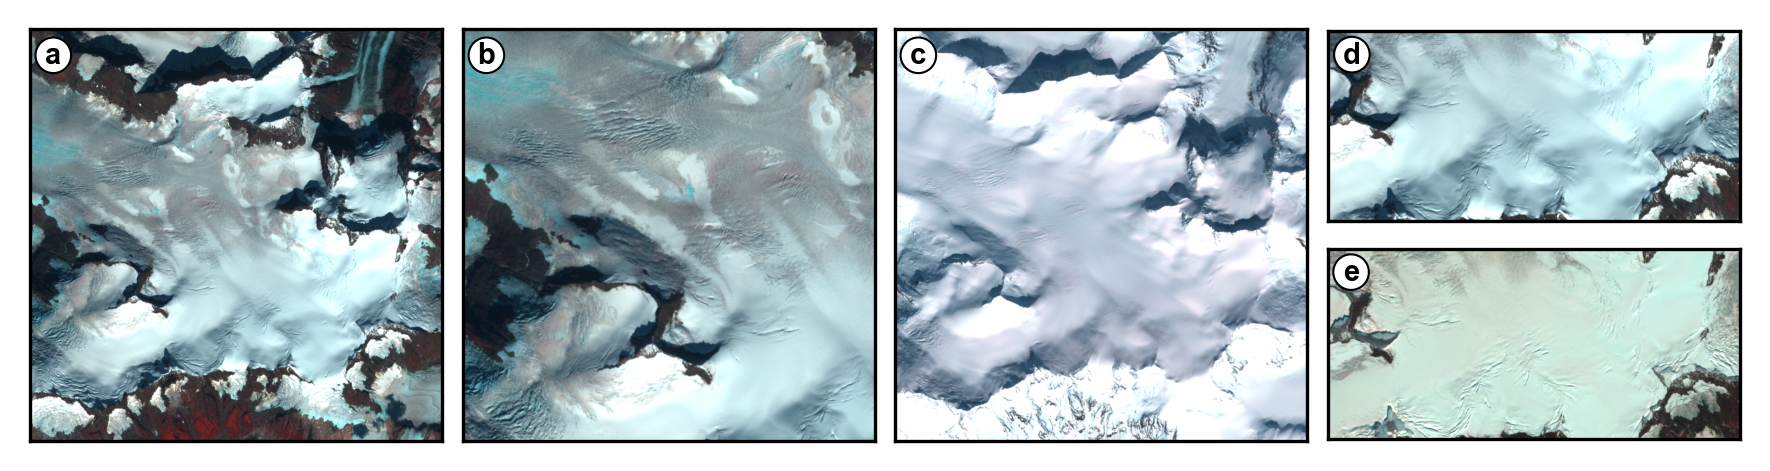

In [9]:
# initiate figure, plot the images
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'

fig,axs = plt.subplots(1,4, figsize=(6,1.75), dpi=300)

ax_rgb = axs[0]
ax_snow = axs[2]
ax_double = axs[3]
ax_class = axs[1]

# add two subplots to highlight the effect of snow-on normalization
ax_double.remove()
axa = plt.subplot2grid((2, 4), (0, 3))
axb = plt.subplot2grid((2, 4), (1, 3))

rgb_plot = format_plot( xr_raw, rgb_bands=[3,1,0], vmin=0, vmax=0.8, scale=0.0001 )
snow_plot = format_plot( xr_snow, rgb_bands=[3,1,0], vmin=0, vmax=1, scale=0.0001 )
norm_plot = format_plot( xr_norm, rgb_bands=[3,1,0], vmin=0, vmax=1, scale=1 )

ax_rgb.imshow( rgb_plot, aspect='equal' )
ax_snow.imshow( snow_plot, aspect='equal' )
ax_class.imshow( rgb_plot, aspect='equal' )

axa.imshow( rgb_plot, aspect='equal' )
axb.imshow( norm_plot, aspect='equal' )

for ax in axs:
    ax.set_xlim(1500,2400)
    ax.set_ylim(2100,1200)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

# limits for normalization examples
for ax in [axa,axb]:
    ax.set_xlim(1700,2350)
    ax.set_ylim(1950,1650)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

# limits for zoom-in class examples
ax_class.set_xlim(1500,2000)
ax_class.set_ylim(1900,1400)

plt.tight_layout(h_pad=0, w_pad=0.5)

# add subplot labels
t0 = axs[0].text(0.037, 0.917, 'a', transform=axs[0].transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
t1 = axs[1].text(0.036, 0.917, 'b', transform=axs[1].transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
t2 = axs[2].text(0.036, 0.917, 'c', transform=axs[2].transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
t3 = axa.text(   0.036, 0.835, 'd', transform=axa.transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
t4 = axb.text(   0.036, 0.835, 'e', transform=axb.transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))

for t in [t0,t1,t2,t3,t4]:
    t.get_bbox_patch().set_boxstyle("circle", pad=0.13)
    
# save
out_path = os.path.join(folder_figures, 'base_final.png')
plt.savefig(out_path, dpi=400, bbox_inches='tight', pad_inches=0.015)